In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from scipy import stats

__As an illustration of multiple regression analysis, we will consider a problem faced by the Trucking Company.
A major portion of business involves deliveries throughout its local area. To develop better work schedules, the managers want to estimate the total daily travel time for their drivers.__

In [2]:
df1 = pd.read_excel("Trucking.xlsx")
df1

,driving_assignment,x1,n_deliveries,travel_time
0,0,100,4,9.3
1,1,50,3,4.8
2,2,100,4,8.9
3,3,100,2,6.5
4,4,50,2,4.2
5,5,80,2,6.2
6,6,75,3,7.4
7,7,65,4,6.0
8,8,90,3,7.6
9,9,90,2,6.1


# Checking for correlation between dependent and independent variables

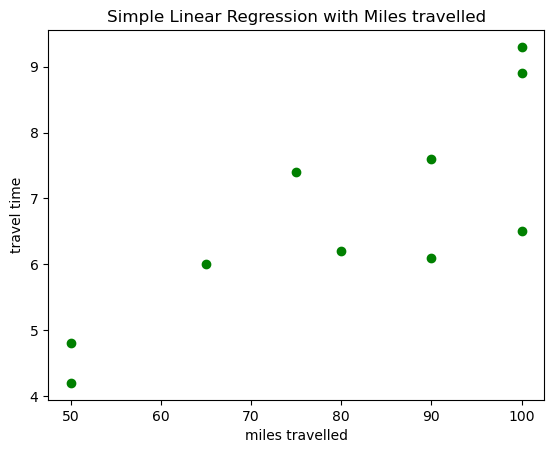

In [4]:
plt.scatter(df1['x1'], df1['travel_time'], color = 'green')
plt.ylabel('travel time')
plt.xlabel('miles travelled')
plt.title('Simple Linear Regression with Miles travelled')
plt.show()

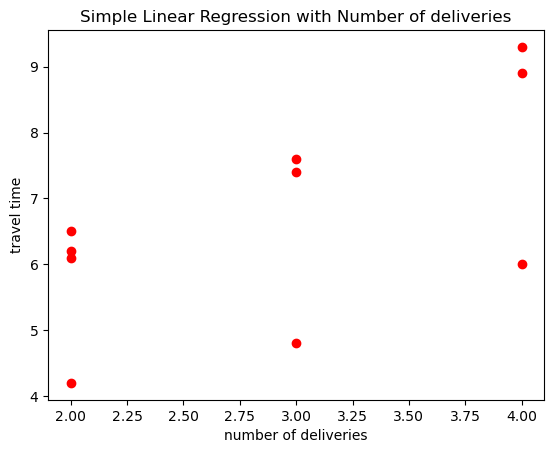

In [5]:
plt.scatter(df1['n_deliveries'], df1['travel_time'], color = 'red')
plt.ylabel('travel time')
plt.xlabel('number of deliveries')
plt.title('Simple Linear Regression with Number of deliveries')
plt.show()

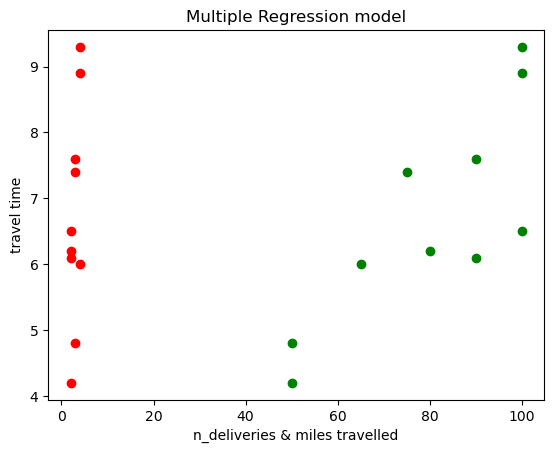

In [20]:
plt.scatter(df1['x1'], df1['travel_time'], color = 'green')
plt.scatter(df1['n_deliveries'], df1['travel_time'], color = 'red')
plt.ylabel('travel time')
plt.xlabel('n_deliveries & miles travelled')
plt.title('Multiple Regression model')
plt.show()

# Model Creation & ANOVA table

In [9]:
Reg1 = ols(formula = "travel_time ~ x1", data = df1)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sat, 17 Jun 2023   Prob (F-statistic):            0.00408
Time:                        12:28:08   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: travel_time = 1.2739 + 0.0678x1__

In [12]:
anova_lm(Fit1)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,15.814578,0.00408
Residual,8.0,8.028696,1.003587,NaN,NaN


__Result: <br>
    SSR = 15.871305 <br>
    SSE = 8.028696 <br>
    SST = 15.871305  + 8.028696__

In [10]:
Reg2 = ols(formula = "travel_time ~ n_deliveries", data = df1)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     4.871
Date:                Sat, 17 Jun 2023   Prob (F-statistic):             0.0583
Time:                        12:28:59   Log-Likelihood:                -16.168
No. Observations:                  10   AIC:                             36.34
Df Residuals:                       8   BIC:                             36.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3797      1.565      2.160   

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: travel_time = 3.3797+  1.1449 n_deliveries__

In [13]:
anova_lm(Fit2)

,df,sum_sq,mean_sq,F,PR(>F)
n_deliveries,1.0,9.044928,9.044928,4.871024,0.05835
Residual,8.0,14.855072,1.856884,NaN,NaN


__Result: <br>
    SSR = 9.044928 <br>
    SSE = 14.855072 <br>
    SST = 9.044928 + 14.855072__

In [11]:
Reg3 = ols(formula = "travel_time ~ x1 + n_deliveries", data = df1)
Fit3 = Reg3.fit()
print(Fit3.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           0.000276
Time:                        12:30:58   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.8687      0.952     -0.913   

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Result: travel_time =  -0.8687 + 0.0611 x1 + 0.9234 n_deliveries__

In [14]:
anova_lm(Fit3)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


__Result: <br>
    SSR = 15.871304 + 5.729252 <br>
    SSE = 2.299443 <br>
    SST = 15.871304 + 5.729252 + 2.299443__

# Residual plot

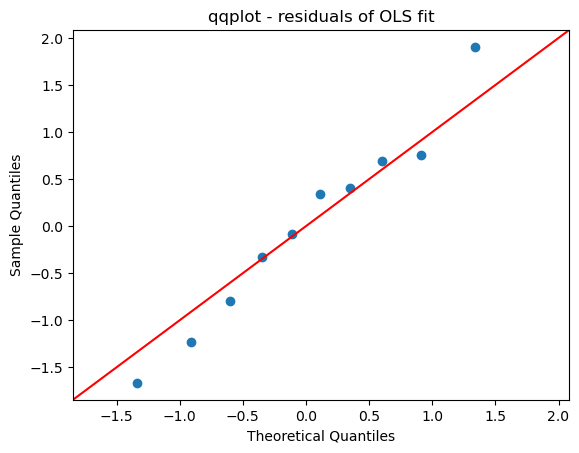

In [16]:
import statsmodels.api as sm
res = Fit3.resid 
probplot = sm.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()